#**Automobile Data Analysis: Classifying MPG Efficiency with ML Models**

In [ ]:
pip install islp #Importing pacakages

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
from ISLP import load_data
Auto = load_data('Auto')

In [ ]:
# Data Preprocessing
Auto.dropna(inplace=True)  # Handle missing values

In [ ]:
# Encoding categorical variables if any
Auto = pd.get_dummies(Auto, drop_first=True)

In [ ]:
# Splitting dataset
X = Auto.drop(columns=['mpg'])  # Assuming 'mpg' is the target column
y = (Auto['mpg'] > Auto['mpg'].median()).astype(int)  # Binary classification based on median mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

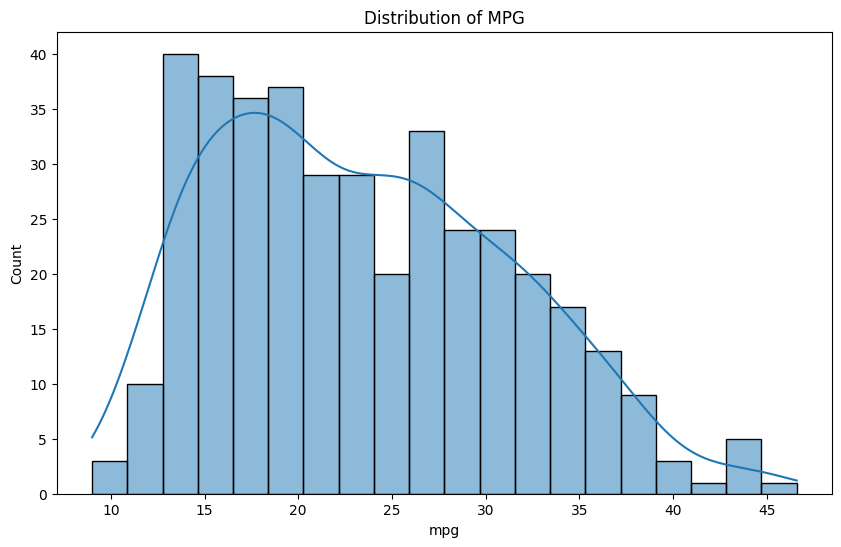

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(Auto['mpg'], bins=20, kde=True)
plt.title('Distribution of MPG')
plt.show()

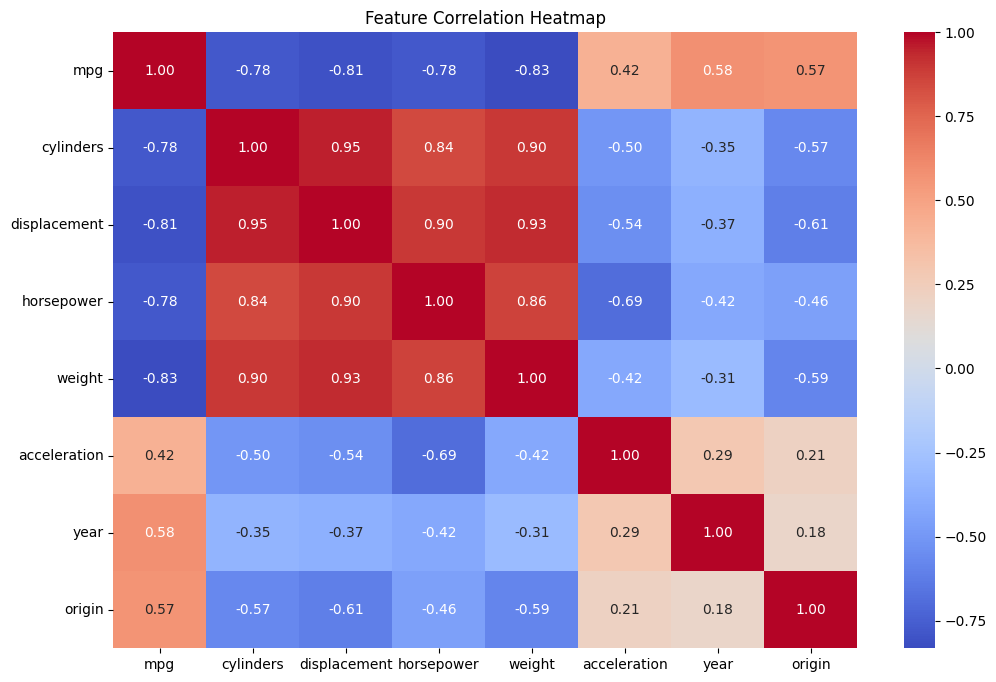

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(Auto.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Model Training
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increased max_iter to prevent convergence issues
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }


In [ ]:
# Hyperparameter Tuning for Naive Bayes
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GridSearchCV(GaussianNB(), param_grid, cv=5)
gnb.fit(X_train, y_train)
best_nb = gnb.best_estimator_


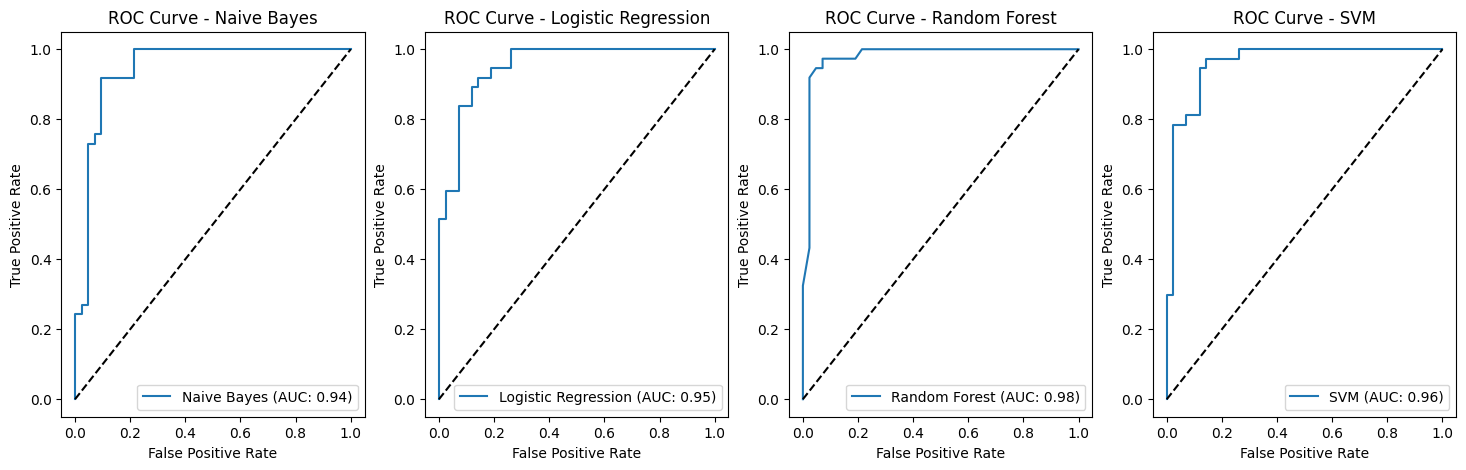

In [ ]:
# Confusion Matrix & ROC Curve
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
for i, (name, model) in enumerate(models.items()):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[i].plot(fpr, tpr, label=f'{name} (AUC: {auc(fpr, tpr):.2f})')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {name}')
    axes[i].legend()
plt.show()


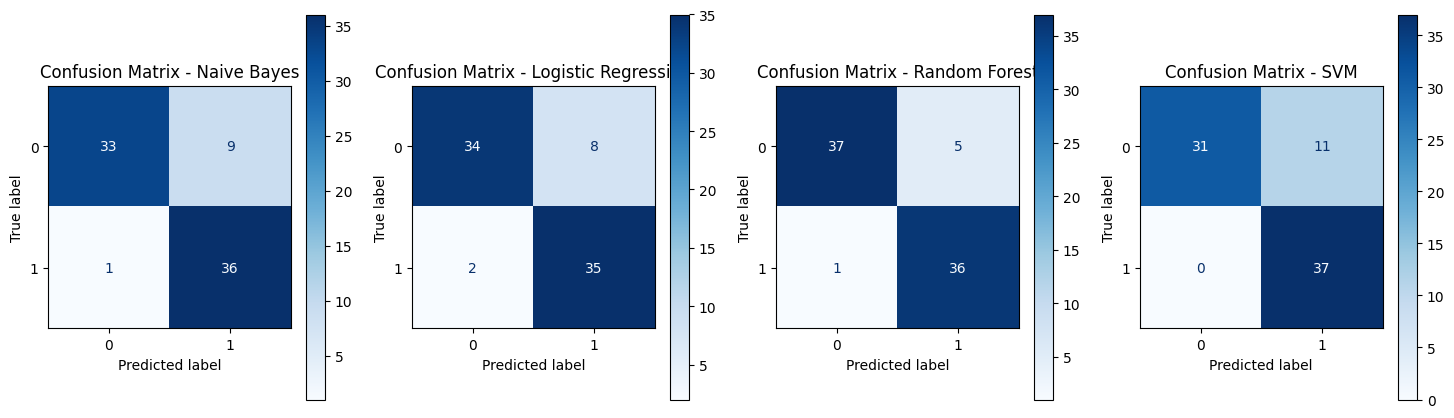

In [ ]:
# Confusion Matrix Display
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - {name}')
plt.show()

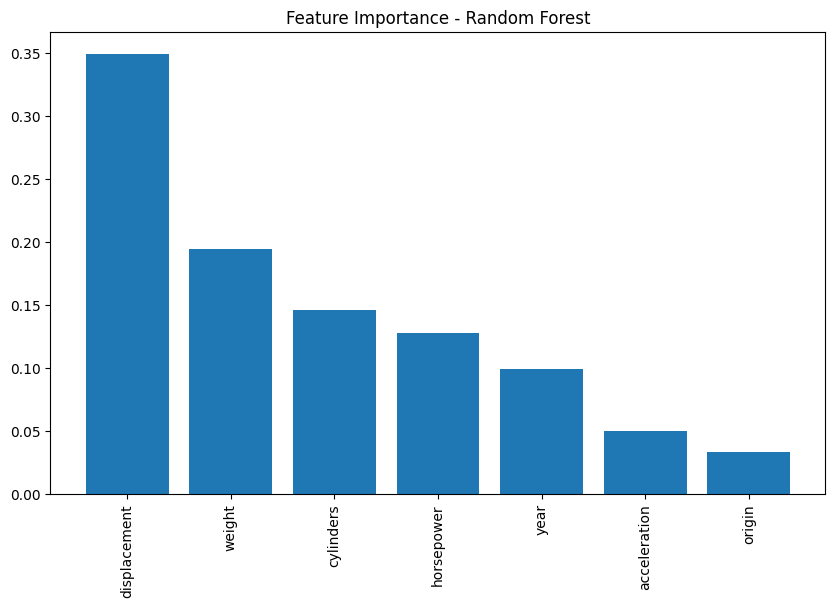

In [ ]:
# Feature Importance for Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(importances)[::-1]

    plt.figure(figsize=(10,6))
    plt.bar(range(X.shape[1]), importances[sorted_idx], align='center')
    plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
    plt.title('Feature Importance - Random Forest')
    plt.show()


In [ ]:
# ML Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])
pipeline.fit(X_train, y_train)
y_pipeline_pred = pipeline.predict(X_test)
print('Pipeline Accuracy:', accuracy_score(y_test, y_pipeline_pred))


Pipeline Accuracy: 0.8734177215189873


In [ ]:

# other
 ML models for comparison
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Define models and their hyperparameters
models = {
    'Naive Bayes': (GaussianNB(), {}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    'XGBoost': (XGBClassifier(eval_metric='logloss'),
             {'n_estimators': [50, 100], 'max_depth': [3, 5]})
}

# Split dataset into train-test sets
X = Auto.drop(columns=['mpg'])  # Assuming 'mpg' is the target
y = Auto['mpg'].apply(lambda x: 1 if x > Auto['mpg'].median() else 0)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# Train models with GridSearchCV
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Classification Report': class_report
    }
    print(f"Completed {model_name} with Accuracy: {accuracy:.4f}\n")

# Display Results
for model, result in results.items():
    print(f"Model: {model}")
    print(f"Best Parameters: {result['Best Params']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("="*50)


Training Naive Bayes...
Completed Naive Bayes with Accuracy: 0.8734

Training SVM...
Completed SVM with Accuracy: 0.8734

Training Decision Tree...
Completed Decision Tree with Accuracy: 0.8734

Training Random Forest...
Completed Random Forest with Accuracy: 0.8987

Training XGBoost...
Completed XGBoost with Accuracy: 0.9241

Model: Naive Bayes
Best Parameters: {}
Accuracy: 0.8734
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        42
           1       0.80      0.97      0.88        37

    accuracy                           0.87        79
   macro avg       0.89      0.88      0.87        79
weighted avg       0.89      0.87      0.87        79

Model: SVM
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.8734
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.81      0.95      0.88        37

  